In [1]:
from math import cos, log, pi, sqrt

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import MatOP

In [2]:
# Random number generator
def BoxMuller(mean, var):
    # y = x*sigma + var
    # => y = sqrt(-2*ln(a)) * cos(2*pi*b) * sigma + mu
    a = np.random.uniform()
    b = np.random.uniform()
    sigma = np.sqrt(var)

    y = sqrt(-2 * log(a)) * cos(2 * pi * b) * sigma + mean
    return y


def printGaussianDist(mean, var):
    Gaussian = []
    for i in range(10000):
        Gaussian.append(BoxMuller(mean, var))
    plt.hist(Gaussian, 100)
    # plt.savefig("Gaussian")
    plt.show()
    plt.clf()

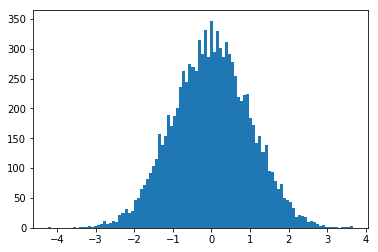

<Figure size 432x288 with 0 Axes>

In [3]:
printGaussianDist(0, 1)

In [4]:
def polyBasis(n, a, w):
    e = BoxMuller(0, a)
    x = np.random.uniform(-10, 10)
    y = 0
    for i in range(n):
        y += x**i * w[i]
    y += e
    return [x, y]


def printPolyBasis(n, a, w):
    x = []
    y = []
    for _ in range(10000):
        res = polyBasis(n, a, w)
        x.append(res[0])
        y.append(res[1])
    plt.scatter(x, y)
    # plt.savefig("Poly")
    plt.show()
    plt.clf()

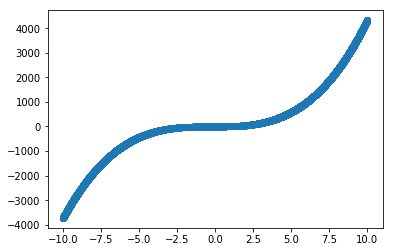

<Figure size 432x288 with 0 Axes>

In [5]:
printPolyBasis(4, 10, [1, 2, 3, 4])

In [6]:
from math import inf


# Sequential Estimator
def WelfordEstimate(mean, var):  # Using online algorithm
    logStack = []
    print("Data point source function: N(%f, %f)\n" % (mean, var))
    Xbar = inf
    prev_Xbar = -inf
    sigma = inf
    prev_Sigma = -inf
    iters = 1
    while abs(Xbar - prev_Xbar) >= 10**-4 or abs(sigma - prev_Sigma) >= 10**-4:
        # set a maximum iteration
        if iters > 100000:
            break

        newData = BoxMuller(mean, var)
        # initial condition
        if iters == 1:
            Xbar = newData
            sigma = 0
        else:
            prev_Xbar = Xbar
            prev_Sigma = sigma
            Xbar = prev_Xbar + (newData - prev_Xbar) / iters
            sigma = prev_Sigma + (
                (newData - prev_Xbar) * (newData - Xbar) - prev_Sigma) / iters
        if iters % 1000 == 0:
            logStack.append([iters, newData, Xbar, sigma])
        iters += 1
    logStack.append([iters, newData, Xbar, sigma])  # final result
    for i in range(len(logStack)):
        print("[%d] Add data point: %f" % (logStack[i][0], logStack[i][1]))
        print("Mean = %f, Variance = %f" % (logStack[i][2], logStack[i][3]))

$$\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}$$
$$\sigma^2_n = \sigma^2_{n-1} + \frac{(x_n - \bar{x}_{n-1})(x_n - \bar{x}_n) - \sigma^2_{n-1}}{n}$$

In [7]:
WelfordEstimate(3, 5)

Data point source function: N(3.000000, 5.000000)

[1000] Add data point: 0.638552
Mean = 2.995231, Variance = 5.116187
[2000] Add data point: 7.759440
Mean = 3.029680, Variance = 4.980532
[3000] Add data point: 2.803813
Mean = 3.001409, Variance = 4.880862
[4000] Add data point: 2.866797
Mean = 3.012543, Variance = 4.938203
[5000] Add data point: 4.797139
Mean = 3.011512, Variance = 4.921341
[6000] Add data point: 3.164240
Mean = 3.010395, Variance = 4.947305
[7000] Add data point: 3.493682
Mean = 2.993605, Variance = 4.925073
[8000] Add data point: -0.915660
Mean = 2.999430, Variance = 4.969189
[9000] Add data point: 2.107322
Mean = 2.989309, Variance = 4.982172
[10000] Add data point: 0.832789
Mean = 2.996000, Variance = 4.988765
[11000] Add data point: 2.175012
Mean = 2.991709, Variance = 5.012433
[12000] Add data point: 5.196102
Mean = 2.996079, Variance = 5.059098
[13000] Add data point: 2.446731
Mean = 2.987926, Variance = 5.046550
[14000] Add data point: 2.370694
Mean = 2.98641

In [8]:
# 3. Baysian Linear regression